## World Development Indicators: Analysis of unemployment rate in India 

### Goals

- Explore the WDI database to understand what type of data is presented in each table;
- Explore the unemployment rate dataset for India;
- Extract the related data from the selected indicators, and prepare for data cleaning and manipulation;
- Create data visualization on unemployment in India over time and compare the unemployment rate in different categories

### Dataset Information

The World Development Indicators (WDI) is the primary World Bank collection of development indicators, compiled from officially-recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates.

The WDI from the World Bank contain over a thousand annual indicators of economic development from hundreds of countries around the world.

Datasets link: https://datacatalog.worldbank.org/search/dataset/0037712

|Table|Total Rows|Total Columns|
--- | --- | ---
|Country|247|31|
|CountryNotes|4857|3|
|FootNotes|532415|4|
|Indicators|5656458|6|
|Series|1345|20|
|SeriesNotes|369|3|

### Importing Packages and Exploring the Database

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import sqlite3
import seaborn as sns

In [2]:
database_ref = "database.sqlite"

conn = sqlite3.connect(database_ref)

cur = conn.cursor()

In [3]:
list_of_tables_query = """
                      SELECT name
                      FROM sqlite_master
                      WHERE type='table';
                      """ 
cur.execute (list_of_tables_query)
print(cur.fetchall())

[('Country',), ('CountryNotes',), ('Series',), ('Indicators',), ('SeriesNotes',), ('Footnotes',)]


There are 6 tables in the database. In order to have a good understanding with the datasets, we plot out each table.

In [4]:
# Country dataframe
country_query = """
                SELECT *
                FROM Country
                LIMIT 10;
                """ 

country = pd.read_sql(country_query, conn)

#Show all columns from dataframes #Increase column width
pd.set_option('display.max_columns', None)

country.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,,,,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996,Value added at basic prices (VAB),IBRD,,Country uses the 1993 System of National Accou...,,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011,2013,2006
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,,Middle East & North Africa,Upper middle income,DZ,1980,,Value added at basic prices (VAB),IBRD,,Country uses the 1968 System of National Accou...,,2011,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",,,2010,2013,2001
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,,East Asia & Pacific,Upper middle income,AS,,,,,,Country uses the 1968 System of National Accou...,,2011 (household consumption only).,,,Special trade system,,,2010,,,Yes,2007,,,
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,,Europe & Central Asia,High income: nonOECD,AD,2000,,Value added at basic prices (VAB),,,Country uses the 1968 System of National Accou...,,,,,Special trade system,,,2011. Population data compiled from administra...,,,Yes,,,2006,


In [5]:
# Country Notes dataframe
countrynotes_query = """
                    SELECT *
                    FROM CountryNotes
                    LIMIT 10;
                    """ 
countrynotes = pd.read_sql(countrynotes_query, conn)

countrynotes.head()

,Countrycode,Seriescode,Description
0,ABW,EG.EGY.PRIM.PP.KD,Sources: Estimated based on UN Energy Statisti...
1,ABW,EG.ELC.RNEW.ZS,Sources: UN Energy Statistics (2014)
2,ABW,EG.FEC.RNEW.ZS,Sources: UN Energy Statistics (2014)
3,ABW,SM.POP.NETM,Data sources : United Nations World Population...
4,ABW,SM.POP.TOTL,Estimates are derived from data on foreign-bor...


In [6]:
# Series dataframe
series_query =  """
                SELECT *
                FROM series
                LIMIT 10;
                """
series = pd.read_sql(series_query, conn)

series.head()

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
0,BN.KLT.DINV.CD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net (BoP, current US$)",,Foreign direct investment are the net inflows ...,,Annual,,,,,,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",,,,,,Open
1,BX.KLT.DINV.WD.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (% of GDP)",,Foreign direct investment are the net inflows ...,,Annual,,,Weighted average,FDI data do not give a complete picture of int...,,Note: Data starting from 2005 are based on the...,"International Monetary Fund, International Fin...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,,,,Open
2,BX.KLT.DINV.CD.WD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (BoP, c...",,Foreign direct investment refers to direct inv...,,Annual,,,Sum,FDI data do not give a complete picture of int...,,Note: Data starting from 2005 are based on the...,"International Monetary Fund, Balance of Paymen...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,,,,Open
3,BM.KLT.DINV.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net outflows (% of ...",,Foreign direct investment are the net inflows ...,,Annual,,,Weighted average,,,Note: Data are based on the sixth edition of t...,"International Monetary Fund, International Fin...",,,,,,Open
4,BN.TRF.KOGT.CD,Economic Policy & Debt: Balance of payments: C...,"Net capital account (BoP, current US$)",,Net capital account records acquisitions and d...,,Annual,,,,,,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",,,,,,Open


In [7]:
# Series notes dataframe
seriesnotes_query = """
                    SELECT *
                    FROM SeriesNotes
                    LIMIT 10;
                    """
seriesnotes = pd.read_sql(seriesnotes_query, conn)

seriesnotes.head()

,Seriescode,Year,Description
0,SP.ADO.TFRT,YR1960,Interpolated using data for 1957 and 1962.
1,SP.DYN.AMRT.FE,YR1960,"Interpolated using data for 1957 and 1962, if ..."
2,SP.DYN.AMRT.MA,YR1960,"Interpolated using data for 1957 and 1962, if ..."
3,SP.DYN.TO65.FE.ZS,YR1960,Interpolated using data for 1957 and 1962.
4,SP.DYN.TO65.MA.ZS,YR1960,Interpolated using data for 1957 and 1962.


In [8]:
# Indicators dataframe
indicators_query = """
                    SELECT *
                    FROM Indicators
                    LIMIT 10;
                    """
indicators = pd.read_sql(indicators_query, conn)

indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [9]:
# Footnotes dataframe
footnotes_query = """
                    SELECT *
                    FROM FootNotes
                    LIMIT 10;
                    """
footnotes = pd.read_sql(footnotes_query, conn)

footnotes.head()

,Countrycode,Seriescode,Year,Description
0,ABW,AG.LND.FRST.K2,YR1990,Not specified
1,ABW,AG.LND.FRST.K2,YR2000,Not specified
2,ABW,AG.LND.FRST.K2,YR2005,Not specified
3,ABW,BX.KLT.DINV.CD.WD,YR1987,Source: United Nations Conference on Trade and...
4,ABW,BX.KLT.DINV.CD.WD,YR1988,Source: United Nations Conference on Trade and...


What information we gain from the tables?
- Country: Presents basic information about each country. We can use ‘CountryCode’ to execute JOIN with most tables.
- Series: Contains information about the available indicators. Connect with others through 'SeriesCode'.
- Indicators: Where all indicators’ values are stored. Connects with Series using IndicatorCode = SeriesCode and with Country using ‘CountryCode’.

### Check if India is presented in this database.

In [10]:
india_query = """
                SELECT *
                FROM country
                WHERE ShortName = 'India';
                """

india_info = pd.read_sql(india_query, conn)
india_info

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,IND,India,India,Republic of India,IN,Indian rupee,Fiscal year end: March 31; reporting period fo...,South Asia,Lower middle income,IN,2011/12,,Value added at basic prices (VAB),IBRD,,Country uses the 2008 System of National Accou...,,2011,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2005/06","Integrated household survey (IHS), 2011/12",,2011,2010,2013,2010


Cool, we can see that we have India's data in the dataset.

### Choosing Indicators

Let’s see what indicators are available for India. We can search for them using CountryCode = 'IND'.  Since for every indicator there are several rows representing the obtained value of each year, we will use SELECT DISTINCT to avoid getting repeated names.

In [11]:
#Using SELECT DISTINCT to not get repeated values 
india_indicators_query = """
                            SELECT DISTINCT IndicatorName
                            FROM Indicators
                            WHERE CountryCode = 'IND';
                            """

india_indicators = pd.read_sql(india_indicators_query, conn)
india_indicators

,IndicatorName
0,"Adolescent fertility rate (births per 1,000 wo..."
1,Age dependency ratio (% of working-age populat...
2,"Age dependency ratio, old (% of working-age po..."
3,"Age dependency ratio, young (% of working-age ..."
4,"Agriculture, value added (% of GDP)"
...,...
1257,Value lost due to electrical outages (% of sales)
1258,"Bird species, threatened"
1259,"Fish species, threatened"
1260,"Mammal species, threatened"


There are over a thousand (1262) of indicators. Instead of trying to read one by one, it makes much more easiler for us to choose a topic of interest, which is 'unemployment', and then query its indicators.

In [12]:
topics_query = """
                SELECT DISTINCT Topic
                FROM Series;
                """

topics = pd.read_sql(topics_query, conn)
topics

,Topic
0,Economic Policy & Debt: Balance of payments: C...
1,Economic Policy & Debt: Balance of payments: C...
2,Economic Policy & Debt: Balance of payments: C...
3,Economic Policy & Debt: Balance of payments: C...
4,Economic Policy & Debt: Balance of payments: R...
...,...
86,Social Protection & Labor: Economic activity
87,Social Protection & Labor: Labor force structure
88,Social Protection & Labor: Migration
89,Social Protection & Labor: Performance


Find all topics on a list

In [13]:
topics_list = [x for x in topics['Topic']] 
topics_list

['Economic Policy & Debt: Balance of payments: Capital & financial account',
 'Economic Policy & Debt: Balance of payments: Current account: Balances',
 'Economic Policy & Debt: Balance of payments: Current account: Goods, services & income',
 'Economic Policy & Debt: Balance of payments: Current account: Transfers',
 'Economic Policy & Debt: Balance of payments: Reserves & other items',
 'Economic Policy & Debt: External debt: Amortization',
 'Economic Policy & Debt: External debt: Arrears, reschedulings, etc.',
 'Economic Policy & Debt: External debt: Commitments',
 'Economic Policy & Debt: External debt: Currency composition',
 'Economic Policy & Debt: External debt: Debt outstanding',
 'Economic Policy & Debt: External debt: Debt ratios & other items',
 'Economic Policy & Debt: External debt: Debt service',
 'Economic Policy & Debt: External debt: Disbursements',
 'Economic Policy & Debt: External debt: Interest',
 'Economic Policy & Debt: External debt: Net flows',
 'Economic Poli

There is a lot of interesting topics for us to choose. In this notebook, we will be focusing on the ‘unemployment’ topic. Let’s find out which indicators are available.

In [14]:
indicators_unemployment_query = """
                                SELECT SeriesCode, IndicatorName
                                FROM Series
                                WHERE Topic LIKE '%Unemployment';
                                """
indicators_unemployment = pd.read_sql(indicators_unemployment_query, conn)
indicators_unemployment

,SeriesCode,IndicatorName
0,SL.UEM.LTRM.ZS,Long-term unemployment (% of total unemployment)
1,SL.UEM.LTRM.FE.ZS,"Long-term unemployment, female (% of female un..."
2,SL.UEM.LTRM.MA.ZS,"Long-term unemployment, male (% of male unempl..."
3,SL.UEM.NEET.FE.ZS,"Share of youth not in education, employment or..."
4,SL.UEM.NEET.MA.ZS,"Share of youth not in education, employment or..."
5,SL.UEM.NEET.ZS,"Share of youth not in education, employment or..."
6,SL.UEM.PRIM.ZS,Unemployment with primary education (% of tota...
7,SL.UEM.PRIM.FE.ZS,"Unemployment with primary education, female (%..."
8,SL.UEM.PRIM.MA.ZS,"Unemployment with primary education, male (% o..."
9,SL.UEM.SECO.ZS,Unemployment with secondary education (% of to...


There are 27 indicators related to unemployment, but we didn’t specify in the query that the indicators should be available for India. 

To do this, we need to merage the tables.
*The Series table doesn’t have a column for Country Code, but the Indicators table does. 

With INNER JOIN, we can define what indicators we want based on conditions related to both tables (Country Code from Indicators and Topic from Series).

In [15]:
indicators_unemployment_ind_query = """
                                SELECT DISTINCT s.SeriesCode, s.IndicatorName
                                FROM Series AS s
                                INNER JOIN Indicators AS i
                                    ON i.IndicatorCode = s.SeriesCode
                                WHERE i.CountryCode = 'IND' AND s.Topic LIKE '%Unemployment';
                                """
indicators_unemployment_ind = pd.read_sql(indicators_unemployment_ind_query, conn)
indicators_unemployment_ind

,SeriesCode,IndicatorName
0,SL.UEM.LTRM.ZS,Long-term unemployment (% of total unemployment)
1,SL.UEM.LTRM.FE.ZS,"Long-term unemployment, female (% of female un..."
2,SL.UEM.LTRM.MA.ZS,"Long-term unemployment, male (% of male unempl..."
3,SL.UEM.NEET.FE.ZS,"Share of youth not in education, employment or..."
4,SL.UEM.NEET.MA.ZS,"Share of youth not in education, employment or..."
5,SL.UEM.NEET.ZS,"Share of youth not in education, employment or..."
6,SL.UEM.PRIM.ZS,Unemployment with primary education (% of tota...
7,SL.UEM.PRIM.FE.ZS,"Unemployment with primary education, female (%..."
8,SL.UEM.PRIM.MA.ZS,"Unemployment with primary education, male (% o..."
9,SL.UEM.SECO.ZS,Unemployment with secondary education (% of to...


In [56]:
indicators_population_ind_query = """
                                SELECT DISTINCT s.SeriesCode, s.IndicatorName
                                FROM Series AS s
                                INNER JOIN Indicators AS i
                                    ON i.IndicatorCode = s.SeriesCode
                                WHERE i.CountryCode = 'IND' AND s.Topic LIKE '%Population';
                                """
indicators_population_ind = pd.read_sql(indicators_population_ind_query, conn)
indicators_population_ind

,SeriesCode,IndicatorName


Cool, seen like we have all the data for India. But we still want to double check to make sure that data is correct.

In [16]:
indicators_unemployment['IndicatorName'].isin(indicators_unemployment_ind['IndicatorName'])

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
Name: IndicatorName, dtype: bool

Now that we have the list of available indicators about unemployment, we could simply make a query for each indicator based on its code and plot the result, like in the example below.

In [17]:
# SL.UEM.TOTL.NE.ZS = Unemployment, total (% of total labor force) (national estimate)
unemployment_bra_query = """
                        SELECT Year, Value
                        FROM Indicators
                        WHERE CountryCode = 'IND' AND IndicatorCode = 'SL.UEM.TOTL.NE.ZS';
                        """
unemployment_bra = pd.read_sql(unemployment_bra_query, conn)
unemployment_bra

,Year,Value
0,1994,3.7
1,1995,2.2
2,1996,2.1
3,1997,2.6
4,1998,3.6
5,2000,4.3
6,2005,4.4
7,2010,3.5
8,2012,3.6
9,2013,4.5


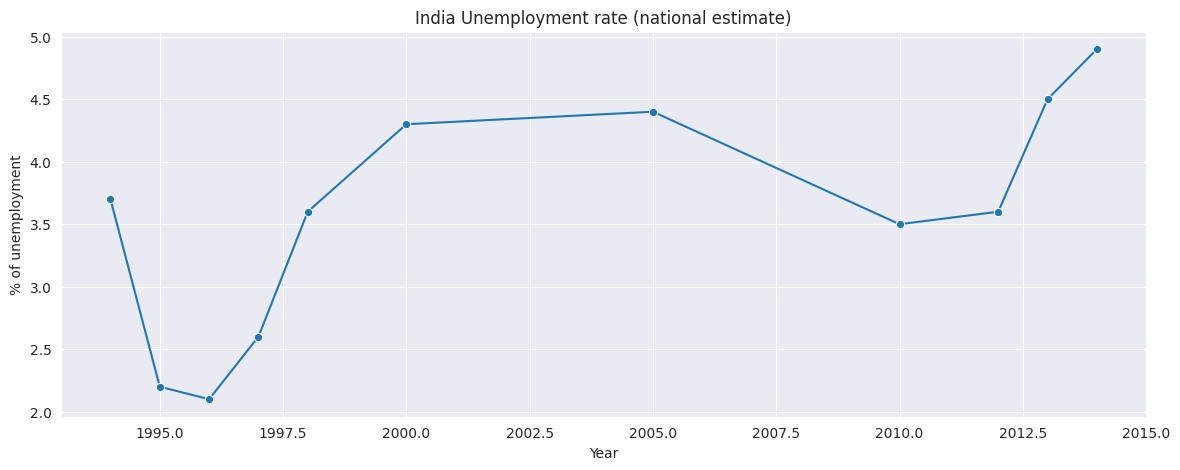

In [18]:
sns.set_style("darkgrid")

plt.figure(figsize=(14,5))

sns.lineplot(data = unemployment_bra, x = 'Year', y = 'Value', marker = 'o')

plt.title('India Unemployment rate (national estimate)')
plt.ylabel('% of unemployment')
#plt.xticks(unemployment_bra['Year'])

plt.show()

In this notebook, we will extract the information about the desired indicators at once and then treat them with our knowledge on the Pandas package.

We still have some choices to make. We have some indicators that seem to be repeated (e.g. ‘Unemployment, total’) where the difference is how they were obtained (national estimate or modeled ILO estimate). Let’s get the ‘Unemployment, total’ indicators and see how they are different from each other.

In [19]:
# SL.UEM.TOTL.ZS = Unemployment, total (% of total labor force) (modeled ILO estimate)
total_unemployment_ilo_query = """
                                SELECT Year, Value
                                FROM Indicators
                                WHERE CountryCode = 'IND' AND IndicatorCode = 'SL.UEM.TOTL.ZS';
                                """
total_unemployment_ilo = pd.read_sql(total_unemployment_ilo_query, conn)
total_unemployment_ilo

,Year,Value
0,1991,4.3
1,1992,4.2
2,1993,4.3
3,1994,3.7
4,1995,4.0
5,1996,4.0
6,1997,4.2
7,1998,4.1
8,1999,4.4
9,2000,4.3


In [20]:
total_unemployment_ne_query = """
                                SELECT Year, Value
                                FROM Indicators
                                WHERE CountryCode = 'IND' AND IndicatorCode = 'SL.UEM.TOTL.NE.ZS';
                                """
total_unemployment_ne = pd.read_sql(total_unemployment_ne_query, conn)
total_unemployment_ne

,Year,Value
0,1994,3.7
1,1995,2.2
2,1996,2.1
3,1997,2.6
4,1998,3.6
5,2000,4.3
6,2005,4.4
7,2010,3.5
8,2012,3.6
9,2013,4.5


### Apply International Labor Organization and National Estimates together

In [21]:
# Example of find the maximum value
max_total_unemployment_ne_query = """
                                SELECT Year, max(Value) AS Maximum
                                FROM Indicators
                                WHERE CountryCode = 'IND' AND IndicatorCode = 'SL.UEM.TOTL.NE.ZS';
                                """
max_total_unemployment_ne_query = pd.read_sql(max_total_unemployment_ne_query, conn)
max_total_unemployment_ne_query

,Year,Maximum
0,2014,4.9


In [22]:
# Example of find the basic statistic 
total_unemployment_ne.describe()

,Year,Value
count,11.000000,11.000000
mean,2003.090909,3.581818
std,7.867078,0.941083
min,1994.000000,2.100000
25%,1996.500000,3.050000
50%,2000.000000,3.600000
75%,2011.000000,4.350000
max,2014.000000,4.900000


In [23]:
# Example of find the average
example_unemployment_ne_query = """
                                SELECT SUM(Value) AS "Total Value", AVG(Value) AS "Average Value"
                                FROM Indicators
                                WHERE CountryCode = 'IND' AND IndicatorCode = 'SL.UEM.TOTL.NE.ZS';
                                """
example_unemployment_ne = pd.read_sql(example_unemployment_ne_query, conn)
example_unemployment_ne

,Total Value,Average Value
0,39.4,3.581818


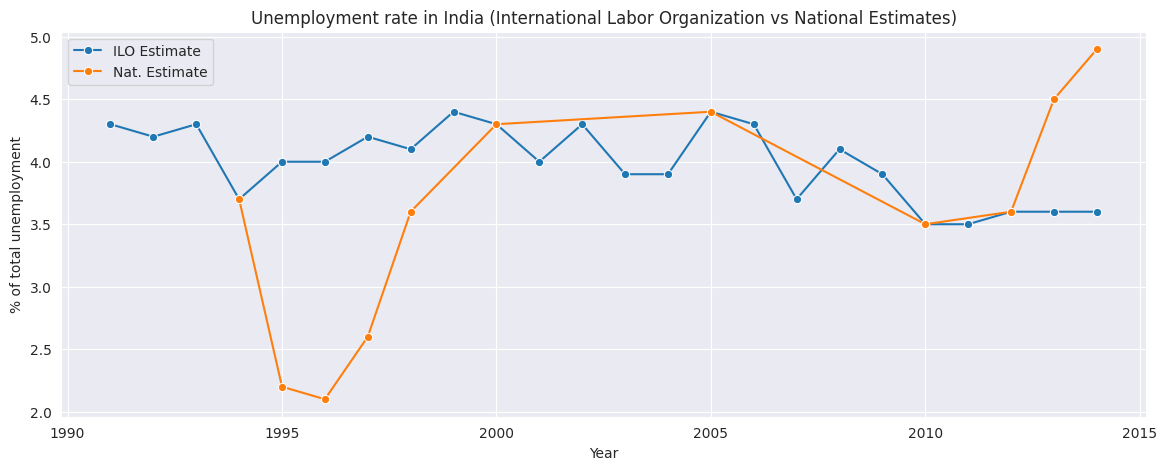

In [24]:
# Plot out the International Labor Organization vs National Estimates data
plt.figure(figsize=(14,5))

sns.lineplot(data = total_unemployment_ilo, x = 'Year', y = 'Value', marker = 'o', label = 'ILO Estimate')
sns.lineplot(data = total_unemployment_ne, x = 'Year', y = 'Value', marker = 'o', label = 'Nat. Estimate')

plt.title('Unemployment rate in India (International Labor Organization vs National Estimates)')
plt.ylabel('% of total unemployment')
plt.legend(loc = 'upper left')

plt.show()

Apart from the fact that the Nat estimate doesn’t have any record before 1994 and missing many data along the years. I’ll be making the choice of dropping ‘national estimate’ indicators when the ILO estimate is available. 

We saw that some indicators started to be recorded later than others. We can ues some aggregate functions to find the number of records, the first and the last year of record available for each indicator. In this query, we will be dropping the indicators that have ‘national estimate’ on their names.

In [25]:
unemployment_ind_query = """
                        SELECT s.SeriesCode, s.IndicatorName, 
                            COUNT(s.SeriesCode) AS num_records, MIN(i.Year) AS min_year, MAX(i.Year) AS max_year
                        FROM Series AS s
                        INNER JOIN Indicators AS i
                            ON i.IndicatorCode = s.SeriesCode
                        WHERE i.CountryCode = 'IND' AND s.Topic LIKE '%Unemployment' 
                            AND s.IndicatorName NOT LIKE '%national estimate%'
                        GROUP BY s.SeriesCode
                        ORDER BY num_records DESC;
                        """
unemployment_ind = pd.read_sql(unemployment_ind_query, conn)
unemployment_ind

,SeriesCode,IndicatorName,num_records,min_year,max_year
0,SL.UEM.1524.FE.ZS,"Unemployment, youth female (% of female labor ...",24,1991,2014
1,SL.UEM.1524.MA.ZS,"Unemployment, youth male (% of male labor forc...",24,1991,2014
2,SL.UEM.1524.ZS,"Unemployment, youth total (% of total labor fo...",24,1991,2014
3,SL.UEM.TOTL.FE.ZS,"Unemployment, female (% of female labor force)...",24,1991,2014
4,SL.UEM.TOTL.MA.ZS,"Unemployment, male (% of male labor force) (mo...",24,1991,2014
5,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",24,1991,2014
6,SL.UEM.PRIM.FE.ZS,"Unemployment with primary education, female (%...",20,1987,2010
7,SL.UEM.PRIM.MA.ZS,"Unemployment with primary education, male (% o...",20,1987,2010
8,SL.UEM.PRIM.ZS,Unemployment with primary education (% of tota...,20,1987,2010
9,SL.UEM.SECO.FE.ZS,"Unemployment with secondary education, female ...",20,1987,2010


Now, we know how many data points do we have in each indicators.

### Extracting and Manipulating the Data for Analysis

In here, we create our final datafreame.

In [26]:
final_query = """
                        WITH Final_Indicators AS
                        (
                            SELECT i.IndicatorName, i.Year, i.Value
                            FROM indicators AS i
                            INNER JOIN Series AS s
                                ON i.IndicatorCode = s.SeriesCode
                            WHERE i.CountryCode = 'IND' AND s.Topic LIKE '%Unemployment' 
                                AND s.IndicatorName NOT LIKE '%national estimate%'
                                AND s.IndicatorName NOT LIKE 'Share%'
                        )  
                        
                        SELECT IndicatorName, Year, Value
                        FROM Final_Indicators;
                        """

final = pd.read_sql(final_query, conn)
final

,IndicatorName,Year,Value
0,Unemployment with primary education (% of tota...,1987,44.700001
1,"Unemployment with primary education, female (%...",1987,34.599998
2,"Unemployment with primary education, male (% o...",1987,46.900002
3,Unemployment with secondary education (% of to...,1987,32.200001
4,"Unemployment with secondary education, female ...",1987,38.000000
...,...,...,...
325,"Unemployment, male (% of male labor force)",2014,3.500000
326,"Unemployment, total (% of total labor force)",2014,3.600000
327,"Unemployment, youth female (% of female labor ...",2014,11.000000
328,"Unemployment, youth male (% of male labor forc...",2014,10.200000


Using the ‘pd.pivot’ function, we can transform the dataframe extracted into something we are more used to work with. With ‘Year’ serving as index, each indicator will be converted to a column on the new dataframe.

In [27]:
df = final.copy().pivot(index = 'Year', columns = 'IndicatorName', values='Value')
df

IndicatorName,Long-term unemployment (% of total unemployment),"Long-term unemployment, female (% of female unemployment)","Long-term unemployment, male (% of male unemployment)",Unemployment with primary education (% of total unemployment),"Unemployment with primary education, female (% of female unemployment)","Unemployment with primary education, male (% of male unemployment)",Unemployment with secondary education (% of total unemployment),"Unemployment with secondary education, female (% of female unemployment)","Unemployment with secondary education, male (% of male unemployment)",Unemployment with tertiary education (% of total unemployment),"Unemployment with tertiary education, female (% of female unemployment)","Unemployment with tertiary education, male (% of male unemployment)","Unemployment, female (% of female labor force)","Unemployment, male (% of male labor force)","Unemployment, total (% of total labor force)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)"
Year,,,,,,,,,,,,,,,,,,
1987,NaN,NaN,NaN,44.700001,34.599998,46.900002,32.200001,38.000000,31.000000,23.100000,27.500000,22.200001,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,41.700001,31.299999,44.099998,33.900002,39.799999,32.500000,24.400000,28.900000,23.400000,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,NaN,41.599998,31.299999,43.900002,34.000000,39.799999,32.700001,24.400000,28.900000,23.400000,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,NaN,NaN,39.099998,32.099998,40.700001,35.599998,38.000000,35.000000,25.299999,29.900000,24.299999,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,38.200001,31.299999,39.900002,36.099998,38.700001,35.500000,25.700001,30.000000,24.600000,5.0,4.0,4.3,11.5,10.2,10.6
1992,NaN,NaN,NaN,37.400002,29.100000,39.599998,36.799999,40.099998,35.900002,25.799999,30.900000,24.400000,4.9,4.0,4.2,11.5,10.2,10.6
1993,NaN,NaN,NaN,34.900002,27.400000,37.000000,38.700001,41.400002,38.000000,26.400000,31.299999,25.100000,4.8,4.0,4.3,11.6,10.4,10.7
1994,NaN,NaN,NaN,34.700001,27.000000,36.799999,38.099998,40.900002,37.299999,27.299999,32.099998,25.900000,3.9,3.6,3.7,8.0,8.3,8.2
1995,NaN,NaN,NaN,32.500000,26.700001,34.099998,39.099998,40.000000,38.799999,28.400000,33.299999,27.000000,4.1,3.9,4.0,8.9,9.0,8.9


In [44]:
nan_count = df.isna().sum()
nan_count

Long-term: Total                26
Long-term: Female               26
Long-term: Male                 26
Primary education                8
Primary education - Female       8
Primary education - Male         8
Secondary education              8
Secondary education - Female     8
Secondary education - Male       8
Tertiary education               8
Tertiary education - Female      8
Tertiary education - Male        8
Female                           4
Male                             4
Total                            4
Youth Female                     4
Youth Male                       4
Youth Total                      4
dtype: int64

There are too many missing value in long-term, so we are not going to use this indicator.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1987 to 2014
Data columns (total 18 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Long-term unemployment (% of total unemployment)                                        2 non-null      float64
 1   Long-term unemployment, female (% of female unemployment)                               2 non-null      float64
 2   Long-term unemployment, male (% of male unemployment)                                   2 non-null      float64
 3   Unemployment with primary education (% of total unemployment)                           20 non-null     float64
 4   Unemployment with primary education, female (% of female unemployment)                  20 non-null     float64
 5   Unemployment with primary education, male (% of male unemployment)  

Simplify those column names.

In [29]:
# Rename column
new_names = ['Long-term: Total', 'Long-term: Female', 'Long-term: Male'
            ,'Primary education', 'Primary education - Female', 'Primary education - Male'
            , 'Secondary education', 'Secondary education - Female', 'Secondary education - Male'
            , 'Tertiary education', 'Tertiary education - Female', 'Tertiary education - Male'
            , 'Female', 'Male', 'Total', 'Youth Female', 'Youth Male', 'Youth Total']

df = df.set_axis(new_names, axis=1)
df

,Long-term: Total,Long-term: Female,Long-term: Male,Primary education,Primary education - Female,Primary education - Male,Secondary education,Secondary education - Female,Secondary education - Male,Tertiary education,Tertiary education - Female,Tertiary education - Male,Female,Male,Total,Youth Female,Youth Male,Youth Total
Year,,,,,,,,,,,,,,,,,,
1987,NaN,NaN,NaN,44.700001,34.599998,46.900002,32.200001,38.000000,31.000000,23.100000,27.500000,22.200001,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,41.700001,31.299999,44.099998,33.900002,39.799999,32.500000,24.400000,28.900000,23.400000,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,NaN,41.599998,31.299999,43.900002,34.000000,39.799999,32.700001,24.400000,28.900000,23.400000,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,NaN,NaN,39.099998,32.099998,40.700001,35.599998,38.000000,35.000000,25.299999,29.900000,24.299999,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,38.200001,31.299999,39.900002,36.099998,38.700001,35.500000,25.700001,30.000000,24.600000,5.0,4.0,4.3,11.5,10.2,10.6
1992,NaN,NaN,NaN,37.400002,29.100000,39.599998,36.799999,40.099998,35.900002,25.799999,30.900000,24.400000,4.9,4.0,4.2,11.5,10.2,10.6
1993,NaN,NaN,NaN,34.900002,27.400000,37.000000,38.700001,41.400002,38.000000,26.400000,31.299999,25.100000,4.8,4.0,4.3,11.6,10.4,10.7
1994,NaN,NaN,NaN,34.700001,27.000000,36.799999,38.099998,40.900002,37.299999,27.299999,32.099998,25.900000,3.9,3.6,3.7,8.0,8.3,8.2
1995,NaN,NaN,NaN,32.500000,26.700001,34.099998,39.099998,40.000000,38.799999,28.400000,33.299999,27.000000,4.1,3.9,4.0,8.9,9.0,8.9


Finally, the data is ready to be plotted and analyzed.

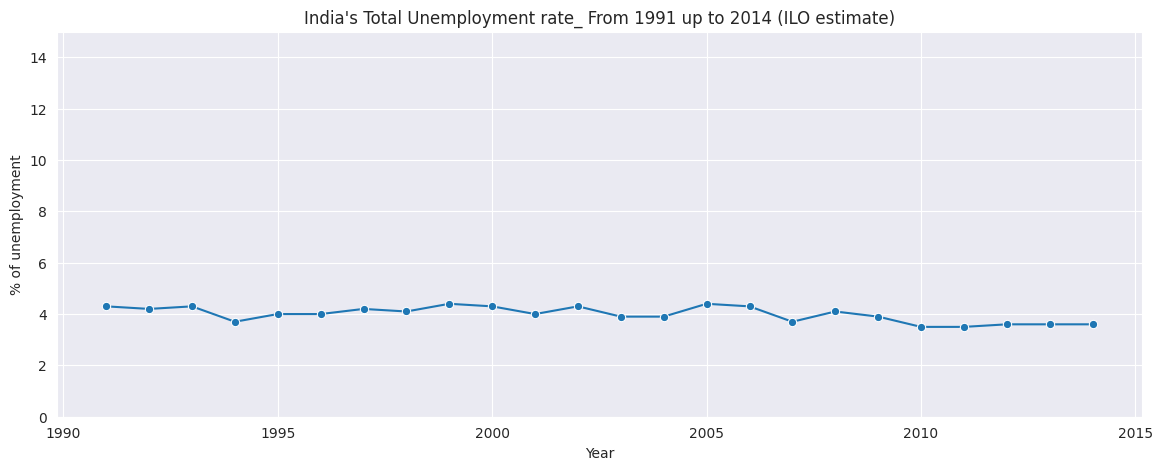

In [30]:
plt.figure(figsize=(14,5))

sns.lineplot(data = df, x = df.index, y = 'Total', marker = 'o')
plt.title("India's Total Unemployment rate_ From 1991 up to 2014 (ILO estimate)")
plt.ylim((0,15))
plt.ylabel('% of unemployment')

plt.show()

In this chart, we can see that the unemployment rate is very consistent in India.

Now we want to dig deeper into the data. Let's look at the unemployment rate in primary education.

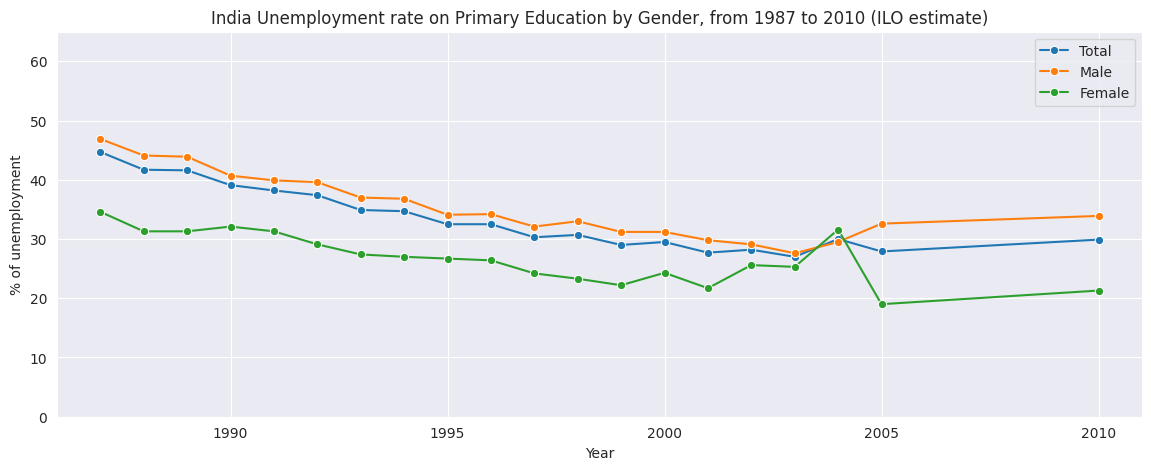

In [31]:
plt.figure(figsize=(14,5))

sns.lineplot(data = df, x = df.index, y = 'Primary education', marker = 'o', label = 'Total')
sns.lineplot(data = df, x = df.index, y = 'Primary education - Male', marker = 'o', label = 'Male')
sns.lineplot(data = df, x = df.index, y = 'Primary education - Female', marker = 'o', label = 'Female')
plt.title('India Unemployment rate on Primary Education by Gender, from 1987 to 2010 (ILO estimate)')
plt.ylim((0,65))
#plt.yticks(range(0,110,10))
plt.ylabel('% of unemployment')
plt.xlim((1986,2011))
plt.legend()

plt.show()

According to above chart, we can see that male has higher unemployment rate than female on primary education and the unemployment rate is decreasing. Also, we can see that there are missing data from 2006 to 2009, and female unemployment rate is extremely high in 2004 (outlier).

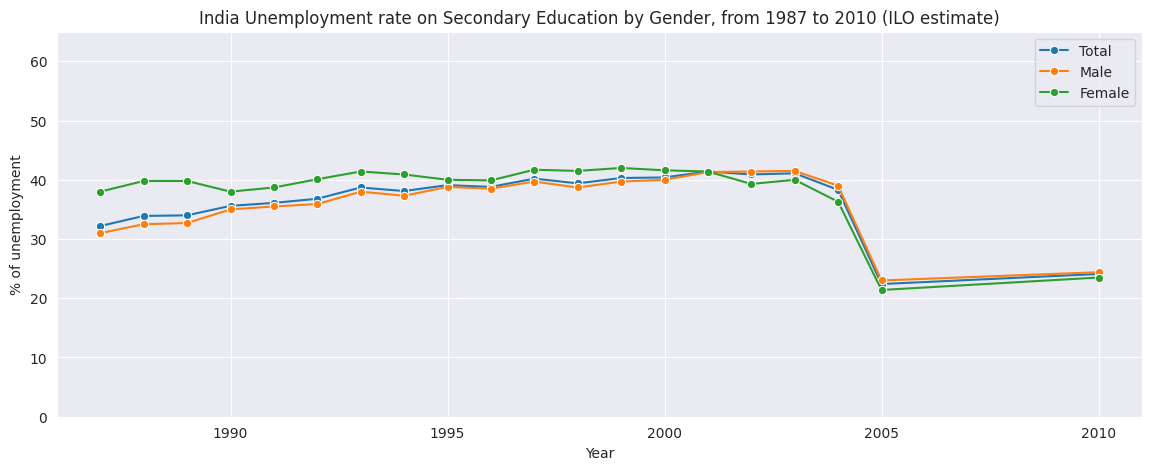

In [32]:
plt.figure(figsize=(14,5))

sns.lineplot(data = df, x = df.index, y = 'Secondary education', marker = 'o', label = 'Total')
sns.lineplot(data = df, x = df.index, y = 'Secondary education - Male', marker = 'o', label = 'Male')
sns.lineplot(data = df, x = df.index, y = 'Secondary education - Female', marker = 'o', label = 'Female')

plt.title('India Unemployment rate on Secondary Education by Gender, from 1987 to 2010 (ILO estimate)')
plt.ylim((0,65))
#plt.yticks(range(0,110,10))
plt.ylabel('% of unemployment')
plt.xlim((1986,2011))
plt.legend()

plt.show()

In this chart, we can see the female and male unemployment rate on secondary education are very close. We can see there are great improvement in 2005.

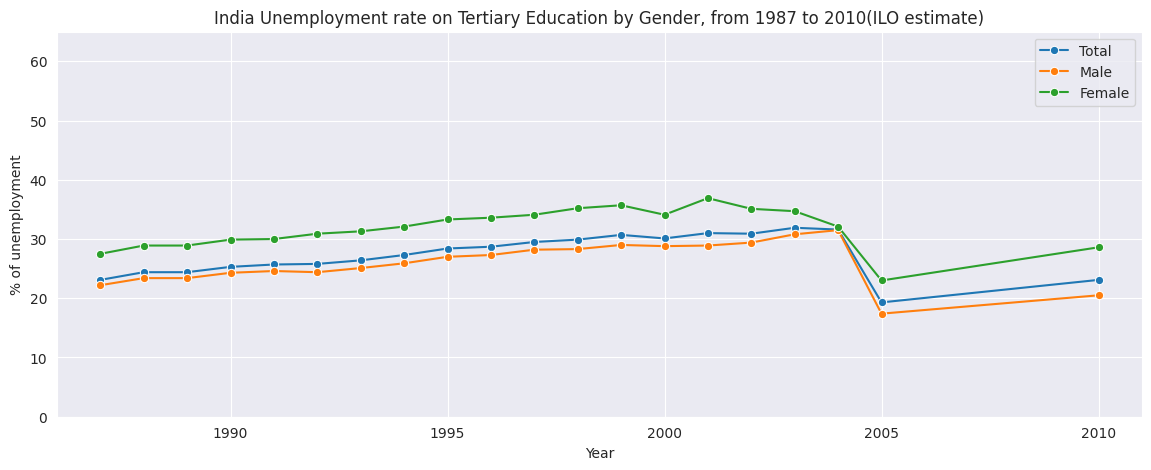

In [33]:
plt.figure(figsize=(14,5))

sns.lineplot(data = df, x = df.index, y = 'Tertiary education', marker = 'o', label = 'Total')
sns.lineplot(data = df, x = df.index, y = 'Tertiary education - Male', marker = 'o', label = 'Male')
sns.lineplot(data = df, x = df.index, y = 'Tertiary education - Female', marker = 'o', label = 'Female')

plt.title('India Unemployment rate on Tertiary Education by Gender, from 1987 to 2010(ILO estimate)')
plt.ylim((0,65))
#plt.yticks(range(0,110,10))
plt.ylabel('% of unemployment')
plt.xlim((1986,2011))
plt.legend()

plt.show()

Again, we can see a great improvement in 2005. Unfortunately, the unemployment rate has increased after 2005.

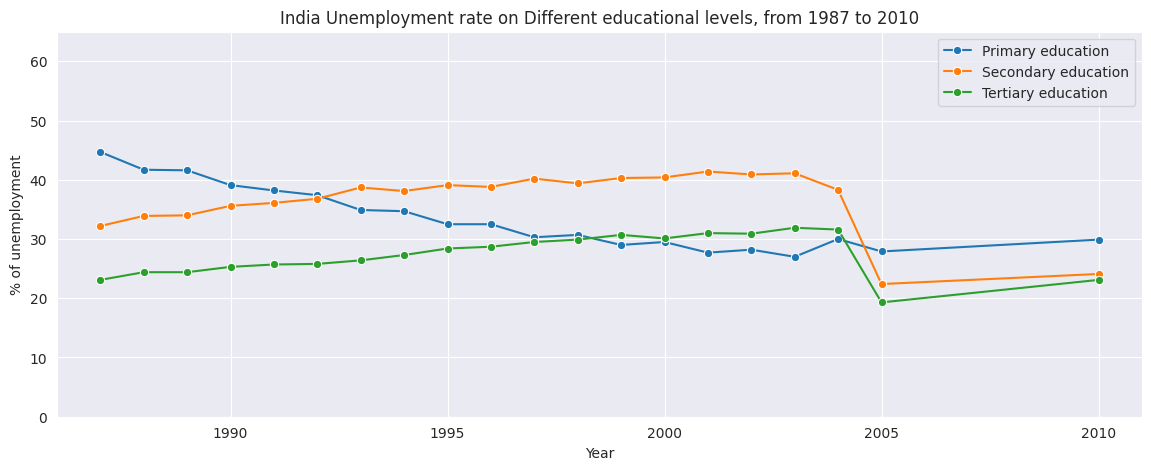

In [34]:
plt.figure(figsize=(14,5))

sns.lineplot(data = df, x = df.index, y = 'Primary education', marker = 'o', label = 'Primary education')
sns.lineplot(data = df, x = df.index, y = 'Secondary education', marker = 'o', label = 'Secondary education')
sns.lineplot(data = df, x = df.index, y = 'Tertiary education', marker = 'o', label = 'Tertiary education')
plt.title('India Unemployment rate on Different educational levels, from 1987 to 2010')
plt.ylim((0,65))
#plt.yticks(range(0,110,10))
plt.ylabel('% of unemployment')
plt.xlim((1986,2011))
plt.legend()

plt.show()

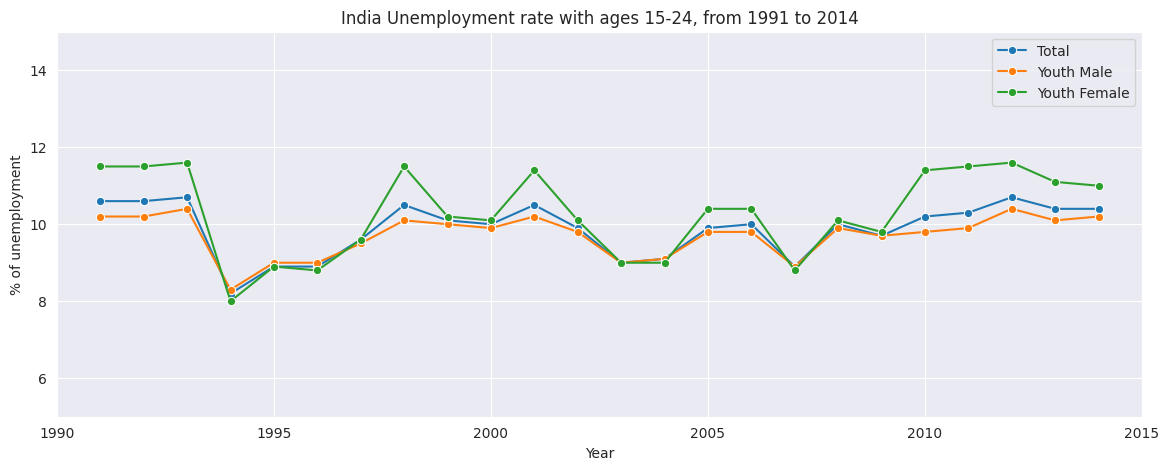

In [51]:
plt.figure(figsize=(14,5))

sns.lineplot(data = df, x = df.index, y = 'Youth Total', marker = 'o', label = 'Total')
sns.lineplot(data = df, x = df.index, y = 'Youth Male', marker = 'o', label = 'Youth Male')
sns.lineplot(data = df, x = df.index, y = 'Youth Female', marker = 'o', label = 'Youth Female')
plt.title('India Unemployment rate with ages 15-24, from 1991 to 2014')
plt.ylim((5,15))
#plt.yticks(range(0,110,10))
plt.ylabel('% of unemployment')
plt.xlim((1990,2015))
plt.legend()

plt.show()

In further research, we should consider the population of different age groups in India. Unfortunately, the Indian 15-24 age group is not included in the data bank database. If we know the population of different age groups, we can know the percentage of unemployed people of different age groups in the total population. This allow us to make further prediction and decision. 

### Findings

Based on above charts in different level of education, we can see the following:

- The primary education has the highest unemployment rate

- There is a great improvement in 2005. So we should do a case study in this year to find out which key factors helped India reduce unemployment.

### Comparison within South Asia

We start this section by querying the unemployment rate in 2014 on countries within the same region as India (South Asia). 

In [38]:
regional_2005_query = """
                        SELECT i.Value, i.CountryName
                        FROM Indicators AS i
                        INNER JOIN Country AS c
                            ON i.CountryName = c.ShortName
                        WHERE i.IndicatorCode = 'SL.UEM.TOTL.ZS' AND i.Year = 2005
                            AND c.Region LIKE 'South Asia%'
                        ORDER BY i.Value DESC;
                        """
regional_2005 = pd.read_sql(regional_2005_query, conn)
regional_2005

,Value,CountryName
0,13.5,Maldives
1,8.5,Afghanistan
2,7.7,Sri Lanka
3,7.1,Pakistan
4,4.4,India
5,4.3,Bangladesh
6,3.1,Bhutan
7,2.3,Nepal


Now, we create a barplot to see the differences

In [40]:
# plotly
fig = px.bar(regional_2005, x="Value", y="CountryName", orientation = 'h', height = 400)

fig.update_layout(
    title=dict(
        text='Unemployment Rate in South Asia in 2005',
        x=0.5,
    ),      
    xaxis=dict(
        title='Unemployment Rate',
        titlefont_size=16,
    ),    
    yaxis=dict(
        title='Countries',
        titlefont_size=16,
    ),
)
fig.show()

We can see that India has a low unemployment rate compare to other countries.

In [41]:
# We dont want to see Maldives because it has a very high unemployment rate
regional_query = """
                SELECT i.Year, i.Value, i.CountryName
                FROM Indicators AS i
                INNER JOIN Country AS c
                    ON i.CountryName = c.ShortName
                WHERE i.IndicatorCode = 'SL.UEM.TOTL.ZS'
                    AND c.ShortName IN ('Nepel','Bhutan','Bangladesh','India','Pakistan','Sri Lanka','Afghanistan')
                ORDER BY i.CountryName;
                """
regional = pd.read_sql(regional_query, conn)
regional

,Year,Value,CountryName
0,1991,8.6,Afghanistan
1,1992,8.6,Afghanistan
2,1993,8.6,Afghanistan
3,1994,8.5,Afghanistan
4,1995,8.5,Afghanistan
...,...,...,...
139,2010,4.9,Sri Lanka
140,2011,4.2,Sri Lanka
141,2012,4.0,Sri Lanka
142,2013,4.4,Sri Lanka


In [42]:
fig = px.bar(regional, x="Value", y="CountryName", orientation = 'h', height = 500 
             , animation_frame= "Year", range_x=[0,20])

fig.update_layout(
    title=dict(
        text='Unemployment Rate in Latin America & Caribbean, from 1981 to 2014',
        x=0.5,
    ),      
    xaxis=dict(
        title='Unemployment Rate %',
        titlefont_size=16,
    ),    
    yaxis=dict(
        title='Countries',
        titlefont_size=16,
    ),
)
# Speed Setting
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500

fig.show()

Compare unemployment rates over the years between selected countries, we can see that the Indian economy is strong and the unemployment rate is consistently below 5%. 

Furthermore, unemployment rate in Sri Lanka has been falling for years. We can try to study the economic situation in Sri Lanka and hopefully find the keys to lowering the unemployment rate.